In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
X=df.drop('sales',axis=1)
y=df['sales']
from sklearn.preprocessing import PolynomialFeatures
polynomial_convertor=PolynomialFeatures(degree=2,include_bias=False)
polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [22]:
poly_features=polynomial_convertor.transform(X)
poly_features.shape

(200, 9)

In [23]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
test_predictions=model.predict(X_test)
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(y_test,test_predictions)
MSE=mean_squared_error(y_test,test_predictions)
RMSE=np.sqrt(MSE)

In [26]:
MSE

0.44175055104033895

In [27]:
train_rmse_errors=[]
test_rmse_errors=[]
for d in range(1,10):
    polynomial_convertor=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_convertor.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model=LinearRegression()
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
                  
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

test_pred

array([-3.31247002e+01,  8.65900137e+01,  8.32156382e+00,  4.97565704e+01,
       -1.04542920e+01,  4.82133855e+00,  1.91197269e+02,  1.06400787e+01,
        3.64928666e+01, -5.04700749e+00,  1.87697129e+02, -7.77503676e+01,
        4.44791701e+01,  1.29242675e+02,  2.07671389e+02,  1.03900065e+01,
        2.45972007e+01,  1.12509905e+01,  7.55092110e+00,  1.41126957e+01,
        4.00730889e+00, -4.21829067e+01,  4.76780376e+02, -1.89824320e+02,
        7.79877759e+00,  4.79670249e+01, -1.16687863e+03,  1.82970397e+01,
       -1.11309555e+01, -8.63245286e+02, -1.09532932e+03,  1.28383133e+01,
        1.40438218e+01, -4.61300285e+02,  1.28112016e+01, -4.42900944e+00,
        1.24069148e+01,  8.15724370e+00, -1.11839158e+01,  5.64534165e+01,
        7.36994389e+05,  3.08507393e+00,  7.52092320e+00, -3.10831103e+02,
        2.02972438e+01,  1.26136112e+01,  1.61578272e+02, -4.39745753e+01,
       -3.38848312e+02, -1.68254864e+02,  5.00894628e+01, -5.74194482e+00,
        5.29705088e+02,  

In [28]:
train_rmse_errors


[1.734594124329376,
 0.5879574085292234,
 0.43393443569020657,
 0.35170836883993556,
 0.2509342923789987,
 0.19369221791234445,
 5.421702222223523,
 0.144845189557325,
 0.1718750825536122]

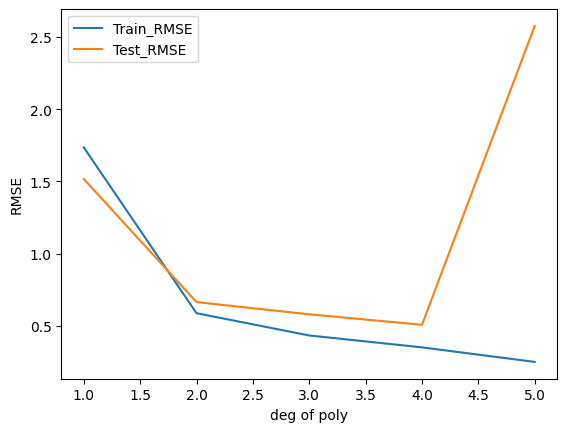

In [29]:
plt.plot(range(1,6),train_rmse_errors[:5],label='Train_RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='Test_RMSE')
plt.xlabel('deg of poly')
plt.ylabel('RMSE')
plt.legend()


In [30]:
final_poly_convertor=PolynomialFeatures(degree=3,include_bias=False)
full_con_x=final_poly_convertor.fit_transform(X)
final_model=LinearRegression()
model.fit(full_con_x,y)

LinearRegression()

In [31]:
from joblib import dump,load
dump(final_model,'final_model_poly.joblib')



['final_model_poly.joblib']

In [32]:
dump(final_poly_convertor,'final_convertor.joblib')

['final_convertor.joblib']

In [33]:
# Ridge Regression
latest_df=pd.read_csv('Advertising.csv')
X1=latest_df.drop('sales',axis=1)
from sklearn.preprocessing import PolynomialFeatures
polynomial_convertor=PolynomialFeatures(degree=3,include_bias=False)
polynomial_features1=polynomial_convertor.fit_transform(X1)
polynomial_features1.shape

(200, 19)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(polynomial_features1, y, test_size=0.3, random_state=101)
X_train.shape

(140, 19)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [36]:
polynomial_features1[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [37]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=10)
ridge_model.fit(X_train,y_train)
test_predictions_latest=ridge_model.predict(X_test)


In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_latest=mean_absolute_error(y_test,test_predictions_latest)
RMSE_latest=np.sqrt(mean_squared_error(y_test,test_predictions_latest))

In [39]:
MAE_latest

0.5774404204714166

In [40]:
RMSE_latest

0.8946386461319648

In [41]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)
alpha_selected = ridge_cv_model.alpha_
test_predictions_ridge=ridge_cv_model.predict(X_test)

MAE_ridge=mean_absolute_error(y_test,test_predictions_ridge)
RMSE_ridge=np.sqrt(mean_squared_error(y_test,test_predictions_ridge))

In [42]:
MAE_ridge

0.42737748843375084

In [43]:
RMSE_ridge

0.6180719926926787

In [44]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

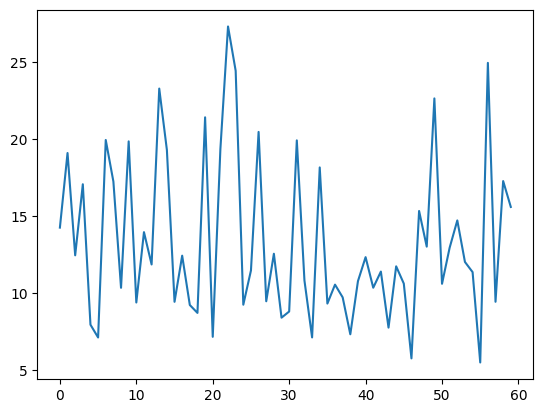

In [47]:
plt.plot(test_predictions_ridge)